In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_csv(r'C:\Users\efvs\Documents\Residencia Ednael\Dados despesas\despesas_todas.csv')

In [8]:
df=df.astype({'Nome Favorecido':'category',
                        'Sigla UF':'category',
                        'Nome Município':'category',
                        'Código Órgão Superior':'int',
                        'Nome Órgão Superior':'category',
                        'Código Órgão':'int',
                        'Nome Órgão':'category',
                        'Código Unidade Gestora':'int',
                        'Nome Unidade Gestora':'category'})

In [11]:
resumo=df.groupby(['Sigla UF','Nome Órgão Superior']).agg({'Valor Recebido':['sum','mean','std','max','min']})

In [13]:
resumo=resumo['Valor Recebido']

In [14]:
resumo

sum  \
Sigla UF Nome Órgão Superior                                              
-1       Advocacia-Geral da União                        12092743.97000   
         Controladoria-Geral da União                   440578517.09000   
         Entidades que utilizam conta única - TCT               0.00000   
         Ministério da Agricultura, Pecuária e Abastec 3336397475.90000   
         Ministério da Cidadania                        109296203.36000   
...                                                                 ...   
TO       Ministério do Planejamento, Desenvolvimento e      28110.00000   
         Ministério do Trabalho                              2579.91000   
         Ministério do Trabalho e Emprego                 5448763.49000   
         Ministério do Turismo                          127098650.04000   
         Presidência da República                        14078791.12000   

                                                                mean  \
Sigla UF Nome Órgão Superior                                           
-1       Advocacia-Geral da União                        38389.66340   
         Controladoria-Geral da União                  2702935.68767   
         Entidades que utilizam conta única - TCT                NaN   
         Ministério da Agricultura, Pecuária e Abastec  458359.31802   
         Ministério da Cidadania                        207787.45886   
...                                                              ...   
TO       Ministério do Planejamento, Desenvolvimento e   28110.00000   
         Ministério do Trabalho                            515.98200   
         Ministério do Trabalho e Emprego                16921.62575   
         Ministério do Turismo                           61075.75687   
         Presidência da República                        33762.08902   

                                                                 std  \
Sigla UF Nome Órgão Superior                                           
-1       Advocacia-Geral da União                       116209.27026   
         Controladoria-Geral da União                  8370705.73691   
         Entidades que utilizam conta única - TCT                NaN   
         Ministério da Agricultura, Pecuária e Abastec 4213371.05626   
         Ministério da Cidadania                        501541.24769   
...                                                              ...   
TO       Ministério do Planejamento, Desenvolvimento e           NaN   
         Ministério do Trabalho                            390.29595   
         Ministério do Trabalho e Emprego               156686.76897   
         Ministério do Turismo                          458268.65810   
         Presidência da República                       107148.80672   

                                                                   max  \
Sigla UF Nome Órgão Superior                                             
-1       Advocacia-Geral da União                        1230874.39000   
         Controladoria-Geral da União                   50162215.39000   
         Entidades que utilizam conta única - TCT                  NaN   
         Ministério da Agricultura, Pecuária e Abastec 117071135.98000   
         Ministério da Cidadania                         1826458.82000   
...                                                                ...   
TO       Ministério do Planejamento, Desenvolvimento e     28110.00000   
         Ministério do Trabalho                             1159.10000   
         Ministério do Trabalho e Emprego                2050153.80000   
         Ministério do Turismo                          18698667.80000   
         Presidência da República                        1323614.02000   

                                                                  min  
Sigla UF Nome Órgão Superior                                           
-1       Advocacia-Geral da União                        -98608.27000  
         Controladoria-Geral da União  

In [24]:
df['Ano e mês do lançamento']=pd.to_datetime(df['Ano e mês do lançamento'])

In [27]:
df['ano']=df['Ano e mês do lançamento'].dt.year
df['mes']=df['Ano e mês do lançamento'].dt.month

# Quais são os órgãos que mais gastam, ano a ano?

In [28]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Código Favorecido,Nome Favorecido,Sigla UF,Nome Município,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,Código Unidade Gestora,Nome Unidade Gestora,Ano e mês do lançamento,Valor Recebido,ano,mes
0,0,0,04890965000158,'' BG NORTE PETROLEO LTDA '',SP,ITAQUAQUECETUBA,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170133,SUPERINTENDENCIA REGIONAL DA RFB NA 8A RF,2014-01-01,1.97000,2014,1
1,1,1,04959500000106,'' MERCADINHO PONTO ALTO LTDA,MG,POUSO ALEGRE,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,154079,CENTRO DE SEL.E DE PROM DE EVENTOS (CESPE),2014-01-01,1495.00000,2014,1
2,2,2,07220177000142,''FILDI HOTEL LTDA.'',SP,SUMARÉ,22000,"Ministério da Agricultura, Pecuária e Abastec",22202,Empresa Brasileira de Pesquisa Agropecuária,135027,EMBRAPA/CNPTIA,2014-01-01,5478.00000,2014,1
3,3,3,04797661000221,''GERRESHEIMER PLASTICOS SAO PAULO LTDA.'',SP,COTIA,36000,Ministério da Saúde,36201,Fundação Oswaldo Cruz,254446,INSTITUTO DE TECNOLOGIA EM FARMACOS,2014-01-01,164756.86000,2014,1
4,4,4,07755826000100,''M-WAS COMERCIAL LTDA.'',SP,TAUBATÉ,26000,Ministério da Educação,26424,Instituto Federal do Tocantins,158131,"INST.FED.DE EDUC.,CIENC.E TEC.DO TOCANTINS",2014-01-01,2000.00000,2014,1


In [131]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
resumo2=df.groupby(['ano','mes','Nome Órgão Superior']).agg({'Valor Recebido':['sum','mean','std','max']})
resumo2=resumo2['Valor Recebido']
resumo2.reset_index(level=2,inplace=True)
resumo2

Nome Órgão Superior              sum  \
ano  mes                                                                   
2014 1                         Advocacia-Geral da União  214556044.74000   
     1                     Controladoria-Geral da União   62970560.10000   
     1         Entidades que utilizam conta única - TCT   11864391.60000   
     1    Ministério da Agricultura, Pecuária e Abastec 1993669146.50000   
     1                          Ministério da Cidadania 2241693566.82000   
...                                                 ...              ...   
2021 12   Ministério do Planejamento, Desenvolvimento e          0.00000   
     12                          Ministério do Trabalho          0.00000   
     12                Ministério do Trabalho e Emprego          0.00000   
     12                           Ministério do Turismo          0.00000   
     12                        Presidência da República          0.00000   

                  mean            std              max  
ano  mes                                                
2014 1    227043.43359  4521740.20595  119289584.32000  
     1    253913.54879  2513011.92134   33358057.58000  
     1   5932195.80000  8007000.28714   11594000.00000  
     1    127050.03483  2629035.57289  174272141.53000  
     1   1545995.56332 54333896.88872 2068406422.00000  
...                ...            ...              ...  
2021 12            NaN            NaN              NaN  
     12            NaN            NaN              NaN  
     12            NaN            NaN              NaN  
     12            NaN            NaN              NaN  
     12            NaN            NaN              NaN  

[2784 rows x 5 columns]

Text(0, 0.5, 'Gasto total anual')

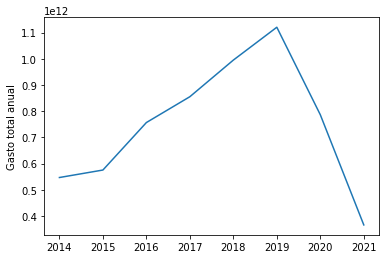

In [133]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
plt.plot(resumo2.groupby(['ano']).agg({'sum':'sum'}))
plt.ylabel('Gasto total anual')

<AxesSubplot:xlabel='ano,mes'>

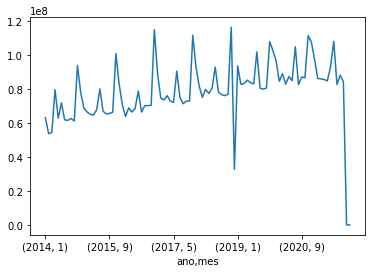

In [152]:
resumo2[resumo2['Nome Órgão Superior']=='Controladoria-Geral da União']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

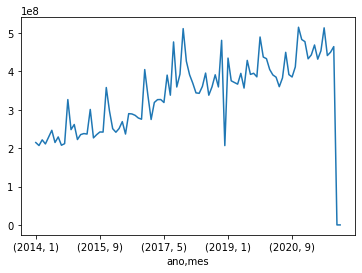

In [135]:
resumo2[resumo2['Nome Órgão Superior']=='Advocacia-Geral da União']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

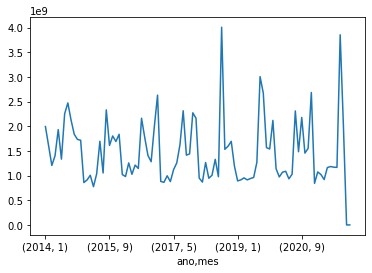

In [136]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Agricultura, Pecuária e Abastec']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

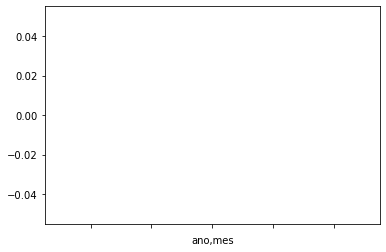

In [137]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Ciência, Tecnologia, Inovações']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

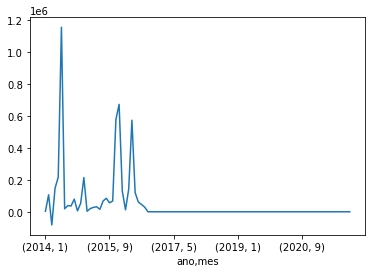

In [138]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Cultura']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

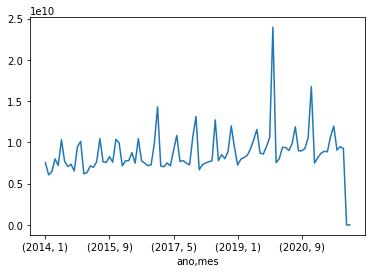

In [139]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Defesa']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

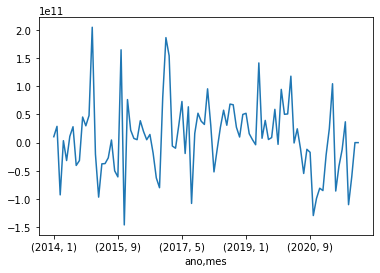

In [140]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Economia']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

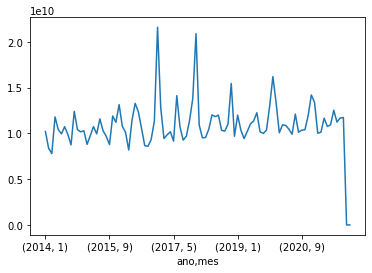

In [141]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Educação']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

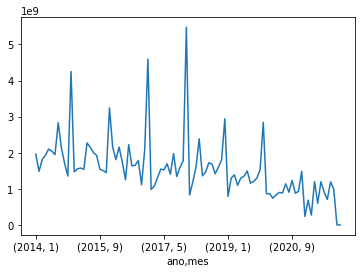

In [142]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Infraestrutura']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

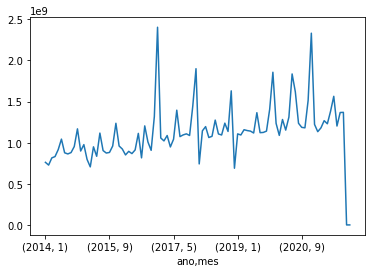

In [143]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Justiça e Segurança Pública']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

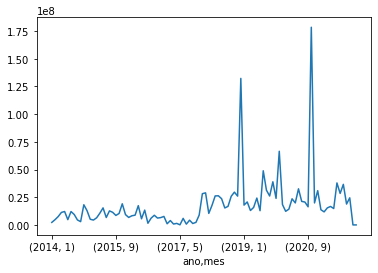

In [144]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Mulher, Família e Direitos Huma']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

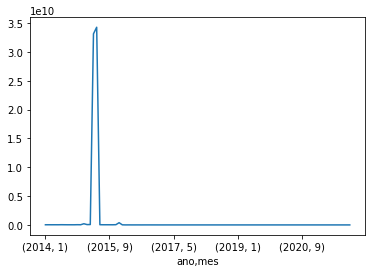

In [145]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Previdência Social']['sum'].plot()

<AxesSubplot:xlabel='ano,mes'>

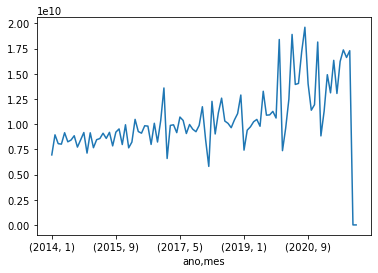

In [146]:
resumo2[resumo2['Nome Órgão Superior']=='Ministério da Saúde']['sum'].plot()

In [147]:
'''freq14=pd.DataFrame(df[df['ano']==2014]['Nome Órgão Superior'].value_counts())
freq15=pd.DataFrame(df[df['ano']==2015]['Nome Órgão Superior'].value_counts())
freq16=pd.DataFrame(df[df['ano']==2016]['Nome Órgão Superior'].value_counts())
freq17=pd.DataFrame(df[df['ano']==2017]['Nome Órgão Superior'].value_counts())
freq18=pd.DataFrame(df[df['ano']==2018]['Nome Órgão Superior'].value_counts())
freq19=pd.DataFrame(df[df['ano']==2019]['Nome Órgão Superior'].value_counts())
freq20=pd.DataFrame(df[df['ano']==2020]['Nome Órgão Superior'].value_counts())
freq21=pd.DataFrame(df[df['ano']==2021]['Nome Órgão Superior'].value_counts())

freq=pd.concat([freq14,freq15,freq16,freq17,freq18,freq19,freq20,freq21],axis=1)
anos=['2014','2015','2016','2017','2018','2019','2020','2021']
freq.columns=anos'''

"freq14=pd.DataFrame(df[df['ano']==2014]['Nome Órgão Superior'].value_counts())\nfreq15=pd.DataFrame(df[df['ano']==2015]['Nome Órgão Superior'].value_counts())\nfreq16=pd.DataFrame(df[df['ano']==2016]['Nome Órgão Superior'].value_counts())\nfreq17=pd.DataFrame(df[df['ano']==2017]['Nome Órgão Superior'].value_counts())\nfreq18=pd.DataFrame(df[df['ano']==2018]['Nome Órgão Superior'].value_counts())\nfreq19=pd.DataFrame(df[df['ano']==2019]['Nome Órgão Superior'].value_counts())\nfreq20=pd.DataFrame(df[df['ano']==2020]['Nome Órgão Superior'].value_counts())\nfreq21=pd.DataFrame(df[df['ano']==2021]['Nome Órgão Superior'].value_counts())\n\nfreq=pd.concat([freq14,freq15,freq16,freq17,freq18,freq19,freq20,freq21],axis=1)\nanos=['2014','2015','2016','2017','2018','2019','2020','2021']\nfreq.columns=anos"